In [16]:
import datetime
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re

from functools import reduce

In [17]:
srcdir = f'{os.getcwd()}/pod2_first_experiment/'
#srcdir = f'{os.getcwd()}/pod2_step_experiment/'

In [18]:
def open_csv(filename):
    dateparse = lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
    content = pd.read_csv(srcdir + filename, 
        parse_dates=['time'],
        index_col='time',
        date_parser=dateparse)
    content = content.interpolate(method='linear', limit_direction='both')
    try:
        content = content.rename(columns=lambda label: 
            re.search('p\d{2}r\d{2}c\d{2}srv\d{2}', label).group(0).upper())
    except:
        pass
    return content

In [19]:
cooler01_signal = open_csv('cooler_fan_signal01.csv')
cooler02_signal = open_csv('cooler_fan_signal02.csv')
cooler03_signal = open_csv('cooler_fan_signal03.csv')
cooler04_signal = open_csv('cooler_fan_signal04.csv')

cooler01_temp = open_csv('cooler_fan_temperature01.csv')
cooler02_temp = open_csv('cooler_fan_temperature02.csv')
cooler03_temp = open_csv('cooler_fan_temperature03.csv')
cooler04_temp = open_csv('cooler_fan_temperature04.csv')

server_powers = reduce(lambda left, right: pd.merge(left, right,
                                            on=['time'],
                                            how='outer'),
                                            [open_csv('power_rack01.csv'),
                                            open_csv('power_rack02.csv'),
                                            open_csv('power_rack03.csv'),
                                            open_csv('power_rack04.csv'),
                                            open_csv('power_rack05.csv'),
                                            open_csv('power_rack06.csv'),
                                            open_csv('power_rack07.csv'),
                                            open_csv('power_rack08.csv'),
                                            open_csv('power_rack09.csv'),
                                            open_csv('power_rack10.csv'),
                                            open_csv('power_rack11.csv'),
                                            open_csv('power_rack12.csv')]).interpolate(
                                                method='linear', limit_direction='both')

server_fans_rpm = reduce(lambda left, right: pd.merge(left, right,
                                            on=['time'],
                                            how='outer'),
                                            [open_csv('fan_rpm_rack01.csv'),
                                            open_csv('fan_rpm_rack02.csv'),
                                            open_csv('fan_rpm_rack03.csv'),
                                            open_csv('fan_rpm_rack04.csv'),
                                            open_csv('fan_rpm_rack05.csv'),
                                            open_csv('fan_rpm_rack06.csv'),
                                            open_csv('fan_rpm_rack07.csv'),
                                            open_csv('fan_rpm_rack08.csv'),
                                            open_csv('fan_rpm_rack09.csv'),
                                            open_csv('fan_rpm_rack10.csv'),
                                            open_csv('fan_rpm_rack11.csv'),
                                            open_csv('fan_rpm_rack12.csv')]).interpolate(
                                                method='linear', limit_direction='both')


In [20]:
# CRAC volumetric flow rate in m^3/s
max_q = 2.2

P02HDZ01_Q = cooler01_signal['signal_default'].rename('P02HDZ01_Q', axis='columns') / 100 * max_q
P02HDZ02_Q = cooler02_signal['signal_default'].rename('P02HDZ02_Q', axis='columns') / 100 * max_q
P02HDZ03_Q = cooler03_signal['signal_default'].rename('P02HDZ03_Q', axis='columns') / 100 * max_q
P02HDZ04_Q = cooler04_signal['signal_default'].rename('P02HDZ04_Q', axis='columns') / 100 * max_q

In [21]:
P02HDZ01_Q

time
2019-10-01 08:00:00    0.7810
2019-10-01 08:01:00    0.7568
2019-10-01 08:02:00    0.7678
2019-10-01 08:03:00    0.7524
2019-10-01 08:04:00    0.7744
                        ...  
2019-10-01 17:55:00    0.7832
2019-10-01 17:56:00    0.7832
2019-10-01 17:57:00    0.7766
2019-10-01 17:58:00    0.7898
2019-10-01 17:59:00    0.7810
Name: P02HDZ01_Q, Length: 600, dtype: float64

In [22]:
# CRAC discharge air temperatures
coeff = 0.9
P02HDZ01_T = cooler01_temp['discharge'].rename('P02HDZ01_T', axis='columns')*coeff
P02HDZ02_T = cooler02_temp['discharge'].rename('P02HDZ02_T', axis='columns')*coeff
P02HDZ03_T = cooler03_temp['discharge'].rename('P02HDZ03_T', axis='columns')*coeff
P02HDZ04_T = cooler04_temp['discharge'].rename('P02HDZ04_T', axis='columns')*coeff

In [23]:
P02HDZ01_T

time
2019-10-01 08:00:00    14.94
2019-10-01 08:01:00    14.94
2019-10-01 08:02:00    14.94
2019-10-01 08:03:00    14.94
2019-10-01 08:04:00    14.94
                       ...  
2019-10-01 17:55:00    14.85
2019-10-01 17:56:00    15.03
2019-10-01 17:57:00    15.21
2019-10-01 17:58:00    15.30
2019-10-01 17:59:00    15.30
Name: P02HDZ01_T, Length: 600, dtype: float64

In [24]:
# Server power in W measured from hot-swap controller
server_powers

,P02R01C01SRV01,P02R01C01SRV02,P02R01C01SRV03,P02R01C02SRV01,P02R01C02SRV02,P02R01C02SRV03,P02R01C03SRV01,P02R01C03SRV02,P02R01C03SRV03,P02R01C04SRV01,...,P02R12C07SRV03,P02R12C08SRV01,P02R12C08SRV02,P02R12C08SRV03,P02R12C09SRV01,P02R12C09SRV02,P02R12C09SRV03,P02R12C10SRV01,P02R12C10SRV02,P02R12C10SRV03
time,,,,,,,,,,,,,,,,,,,,,
2019-10-01 08:00:00,78.0,72.0,72.1,72.0,71.1,75.0,61.2,72.0,72.0,72.0,...,44.40,46.0,39.0,40.100000,60.0,41.4,60.000000,39.00,41.8,60.00
2019-10-01 08:01:00,78.0,72.0,74.7,72.0,71.1,75.0,45.6,48.6,72.0,72.0,...,44.40,46.0,39.0,40.100000,60.0,41.4,60.000000,39.00,41.8,60.00
2019-10-01 08:02:00,78.0,72.0,74.7,72.0,67.5,75.0,47.7,45.0,72.0,72.0,...,52.20,50.0,40.5,44.350000,60.1,40.2,61.209677,41.70,41.0,50.55
2019-10-01 08:03:00,69.2,72.0,66.9,72.0,45.9,75.0,71.1,45.0,72.0,72.0,...,60.00,54.0,42.0,48.600000,60.2,39.0,62.419355,44.40,40.2,41.10
2019-10-01 08:04:00,64.8,72.0,65.3,72.0,49.5,75.0,72.0,45.0,72.0,72.0,...,60.00,48.5,40.5,54.300000,62.7,39.0,61.509677,48.00,48.0,49.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-01 17:55:00,53.0,72.0,72.0,69.0,72.0,75.0,72.0,67.8,73.1,72.0,...,57.90,53.0,66.0,50.892857,60.0,41.8,60.000000,62.10,40.2,60.00
2019-10-01 17:56:00,55.0,72.0,72.0,67.0,72.0,75.0,72.0,67.2,72.9,72.0,...,49.50,46.0,63.0,52.846429,60.0,49.5,53.750000,61.05,48.7,60.00
2019-10-01 17:57:00,75.0,72.0,72.0,51.6,71.1,75.0,72.0,73.2,72.0,72.0,...,41.10,39.0,60.0,54.800000,60.0,57.2,47.500000,60.00,57.2,60.00


In [25]:
# Chassi fan specs from PFR0812DHE fan datasheet
# Max input power in W
Pmax = 25.2
# Max RPM
Nmax = 11000.0
# Operational speed (RPM)
Nop = 10000.0
# Max air flow in CFM
Qmax = 109.7
# Fans per server
Nfans = 2
# Operational power from cube law of fans
Pop = Pmax / (Nmax / Nop)**3 * Nfans
# Assume fan volumetric flow is proportional to power 
# around operating point
Qop = Qmax / (Pmax / Pop)
# Calculate flow in m^3/s per RPM at
Q_per_RPM =  Qop * 0.3048**3 / 60 / Nop

server_flows = server_fans_rpm * Q_per_RPM

In [26]:
# Kinematic viscosity of air (m^2/s)
nu = 1.568e-5
# Thermal conductivity (kW/m K)
k = 2.624e-5
# Prandtl number of air
Pr = 0.707
# Calculate the expected temperature jump across the servers (convert to kW)
def deltaT(p, q):
    return (p / 1000 * nu) / (q * k * Pr)

server_deltaT = deltaT(server_powers, server_flows)

In [27]:
# ts = server_flows.index.astype(np.int64) // 10**9 # unix timestamp

server_deltaT = server_deltaT.rename(columns=lambda label: f'{label}_T')

server_flows = server_flows.rename(columns=lambda label: f'{label}_Q')

output = pd.DataFrame({
    'P02HDZ01_T': P02HDZ01_T,
    'P02HDZ02_T': P02HDZ02_T,
    'P02HDZ03_T': P02HDZ03_T,
    'P02HDZ04_T': P02HDZ04_T,
    'P02HDZ01_Q': P02HDZ01_Q,
    'P02HDZ02_Q': P02HDZ02_Q,
    'P02HDZ03_Q': P02HDZ03_Q,
    'P02HDZ04_Q': P02HDZ04_Q,
    })
output = reduce(lambda left, right: pd.merge(left, right,
                                            on=['time'],
                                            how='outer'),
                                            [output, server_deltaT, server_flows])
output.to_csv(srcdir + 'input.csv', index=True, header=True)

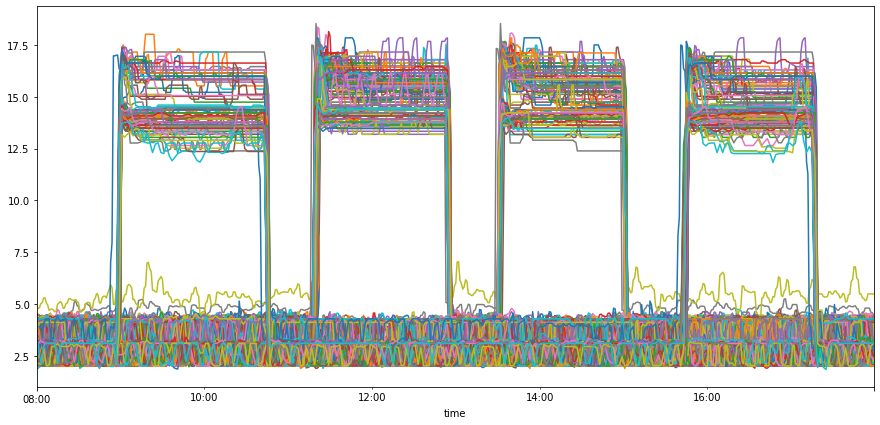

In [28]:
server_deltaT.plot(figsize=(15, 7), legend=False)

In [29]:
#server_powers.plot(figsize=(15, 7), legend=False)

In [30]:
#server_fans_rpm.plot(figsize=(15, 7), legend=False)